In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
tracks = pd.read_csv('tiktok_spotify.csv')

# 1. Data preprocessing

 ### - Inspect data

In [365]:
tracks.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,followers,explicit
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE,1841740,True
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE,3665881,True
2,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE,251986,True
3,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE,781598,False
4,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,26cMerAxjx9GedFt0lMDjm,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,...,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,7BoobGhD4x5K96Me0hqC8Q,2.046200,TIKTOK DANCE,706795,True


In [366]:
tracks.shape

(4645, 25)

**Dataset has already been de-duplicate when request data from Spotify API**

In [367]:
tracks.duplicated().sum()

0

In [368]:
tracks.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_id',
       'playlist_name', 'duration_mins', 'genre', 'followers', 'explicit'],
      dtype='object')

In [369]:
tracks = tracks.drop(columns=["track_id","artist_id", "album_id", "playlist_id", "playlist_name", "track_name", "artist_name"])

In [370]:
tracks.isna().sum(axis = 0)

duration            0
release_date        0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_mins       0
genre               0
followers           0
explicit            0
dtype: int64

In [308]:
tracks.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,followers
count,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4.645000e+03
mean,195478.077718,52.908934,0.733049,0.634902,5.214639,-6.940389,0.590312,0.136715,0.213998,0.038920,0.180000,0.546870,120.779888,3.257968,4.283509e+06
std,60539.483675,24.779147,0.139343,0.179983,3.697632,2.953598,0.491829,0.128095,0.235649,0.148574,0.135263,0.235788,25.964047,1.008991,1.112453e+07
min,43426.000000,0.000000,0.150000,0.023700,0.000000,-26.888000,0.000000,0.023200,0.000010,0.000000,0.019300,0.033100,54.367000,0.723767,1.000000e+00
25%,156360.000000,39.000000,0.655000,0.513000,1.000000,-8.493000,0.000000,0.046500,0.030500,0.000000,0.093600,0.365000,100.175000,2.606000,9.356000e+03
50%,188074.000000,59.000000,0.746000,0.637000,5.000000,-6.490000,1.000000,0.081000,0.121000,0.000001,0.123000,0.545000,121.931000,3.134567,1.631490e+05
75%,224000.000000,72.000000,0.836000,0.771000,8.000000,-4.931000,1.000000,0.191000,0.316000,0.000420,0.233000,0.740000,135.012000,3.733333,2.316471e+06
max,716206.000000,100.000000,0.990000,0.999000,11.000000,1.077000,1.000000,0.911000,0.991000,0.962000,0.952000,0.998000,216.053000,11.936767,9.228838e+07


---
### - Transformation

**As the above summary statistics shows, the `Instrumentalness` and `mode` seems to have unusual distribution with the quartiles and max/min value differ significantly. Two histogram will be used to investigate the distribution.**

---

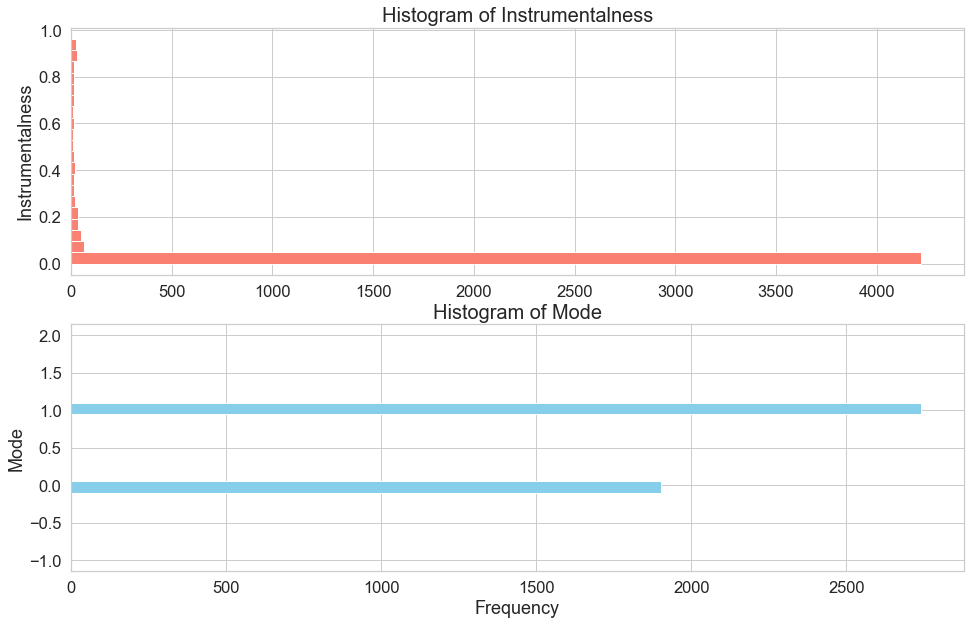

In [396]:
#Set style and create figure
fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.set_style("whitegrid")

# Plot on each ax
ax[0].hist(x = "instrumentalness", data = tracks, bins = 20, color="salmon", orientation = "horizontal")
ax[0].set_title("Histogram of Instrumentalness", fontsize = 20)
ax[0].set(ylabel = "Instrumentalness")

ax[1].hist(x = "mode", data = tracks, range = (-1,2), bins = 20, color="skyblue", orientation = "horizontal")
ax[1].set_title("Histogram of Mode", fontsize = 20)
ax[1].set(ylabel = "Mode", xlabel = "Frequency")

plt.show()

---
**As the histograms show above, the `mode` seems to be more of a categorical variable and `instrumentalness` has most of the observation with the value 0. From the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) documentation:**

* Instrumentalness:
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


* Mode:
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Hence, transformation will be apply to those variable

---

In [375]:
# for mode: 0 will be 'minor' and 1 will be 'major'
tracks["major_minor"] = np.where(tracks["mode"]==0, "Minor", "Major")

# for instrumentalness: if the score higher than 0.5, it's instrumental, vocal otherwise
tracks["Instrumental"] = np.where(tracks["instrumentalness"] > 0.5, "Instrumental", "Vocal")

---
# 2. Exploratory Data Analysis
---

*First, take a look at what's the distribution of the release date of the tracks in this data set.*

---

In [314]:
dates = pd.to_datetime(tracks["release_date"])
np.sum(dates<"1990"),np.sum((dates>="1990") & (dates <"2000")),np.sum((dates>="2000") & (dates <"2010")),np.sum(dates>="2010")

(35, 43, 292, 4275)

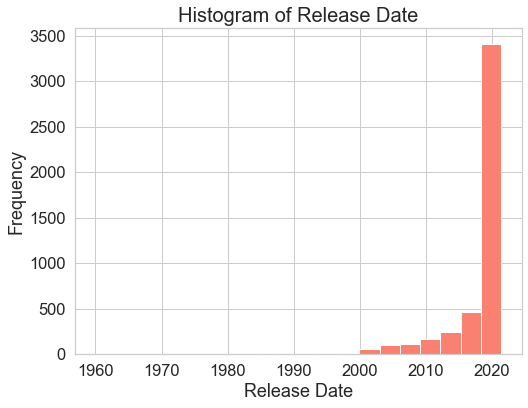

In [398]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

plt.hist(x = dates, bins = 20, color="salmon")

plt.title("Histogram of Release Date", fontsize = 20)
plt.xlabel("Release Date")
plt.ylabel("Frequency")
plt.show()

---
*Without surprise, since Tiktok is a emerging platform, its target audience consists of mostly young generation who's music choice would be more contemporary; if the number is not concrete enough, the histogram shows how heavily the use of new music is; although this dataset does not include every tracks used in the platform, but the sample reflects the distribution to a certain degree.*

*The original `release_date` column will then be transform into `Era` column to reflects which decades the song was released.*

---

In [407]:
tracks["Era"] = np.where(dates<"1990", "Before 90s", 
                         np.where((dates>="1990") & (dates <"2000"), "1990s", 
                                  np.where((dates>="2000") & (dates <"2010"), "2000s",
                                          np.where((dates>="2010") & (dates <"2020"), "2010s", "2020s"))))

---
### What era are more popular?

*From the plot below, it's not hard to see that the mean popularity score of tracks from different decades are relatively on the same level except for the latest one which can be explained by the fact that the popularity only gain steam over the years and only a few hits can make it to the top of the chart in months. 
However it's interesting that the "tail" of the distribution -- the one with lower popularity score -- tends to be shorter for older songs. This may imply the fact the the "old" songs used in TikTok nowadays are more or less the "classic" one. In other word, if you are to play the retro vibe, the classic songs won't goes wrong.*

---

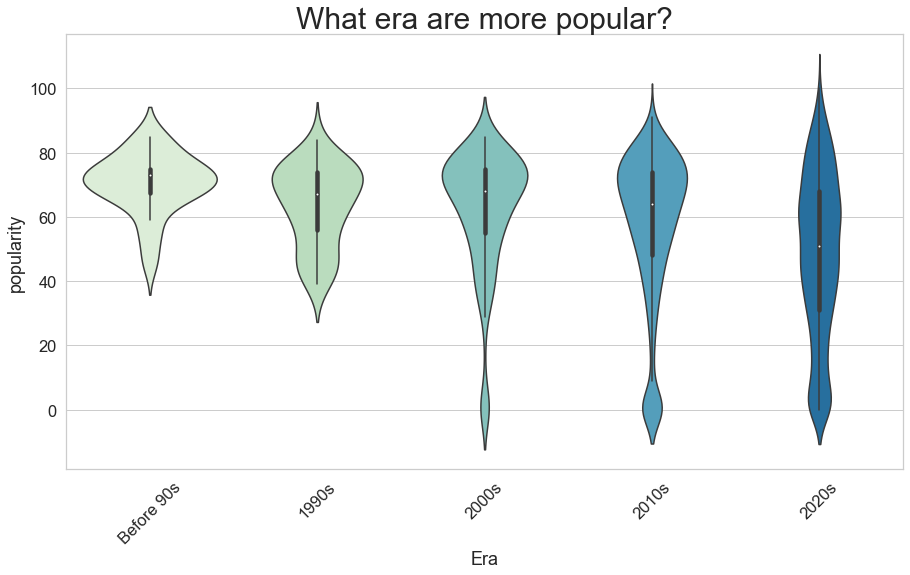

In [326]:
sns.set(font_scale = 1.5, rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")

order = ["Before 90s", "1990s", "2000s", "2010s", "2020s"]

sns.violinplot(y = "popularity", x = "Era", data = tracks, 
               order = order, 
               palette = "GnBu")

plt.xticks(rotation = 45)
plt.title("What era are more popular?", fontsize = 30)
plt.show()

---
### Does songs getting shorter?

*The answer is yes. The graph below shows that those tracks from the last ten years are relatively shorter than the previous generation. The higher pace life style and culture after 21st century may contribute to this shift, and the fact that Tiktok is a short-form video social networking service could be driving users choose the songs that represents the characteristics in the shortest time.*

---

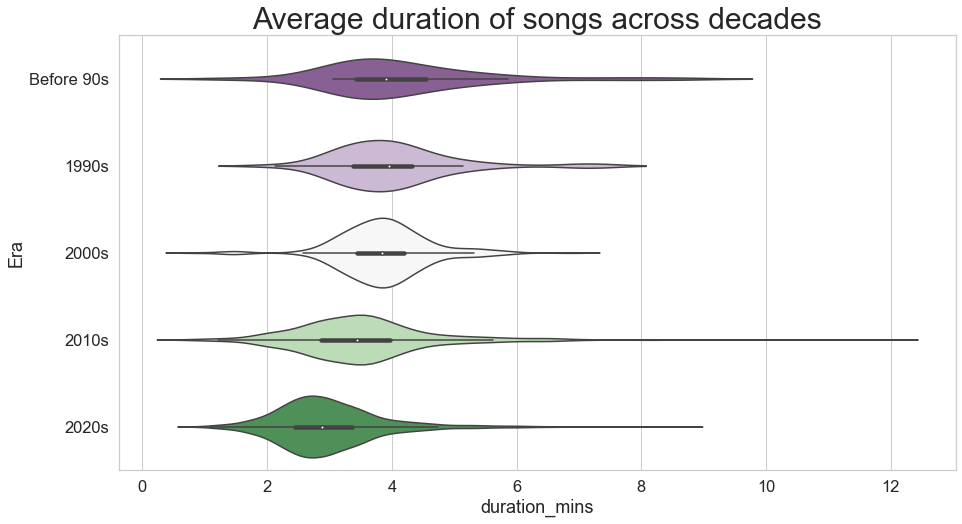

In [327]:
sns.violinplot(x = "duration_mins", y = "Era", data = tracks, order = order, palette = "PRGn")

plt.title("Average duration of songs across decades", fontsize = 30)
plt.show()

---
### How long of a song should I choose?

*The mean duration of songs from the data set is around 3.25 minutes, as we can see below. However, there's not necessary a linear relationships between the popularity and the duration; most of the songs in this dataset are in the range of 2-4 minutes long, and a large cluster of them are slightly above the average and have a popularity score of 75.*

---

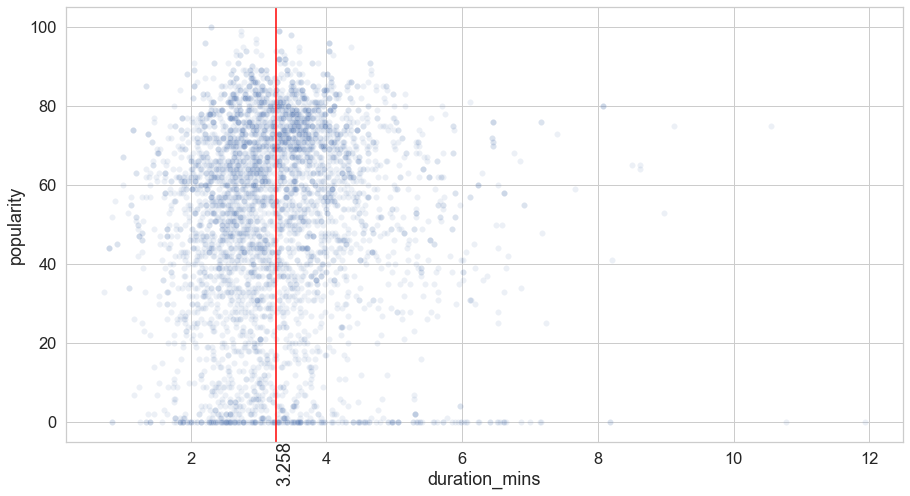

In [405]:
# plt.figure(figsize = (10,10))
sns.scatterplot(x = 'duration_mins', y = 'popularity', data = tracks, alpha = 0.1)
duration_mean = np.round(np.mean(tracks["duration_mins"]), 3)
plt.axvline(duration_mean, c = "red")
plt.text(duration_mean, -15 ,str(duration_mean), rotation = 90)
plt.show()

---
### How fast the songs differ across decades?

*`Tempo` is defined as a measurement of how fast a song is in beats per minutes(bpm). From the previous analysis it shows that the trend of duration is getting shorter, but does it get faster as well? Yes, but not so much, from the graph below. The latest songs are slightly getting faster than the previous one, but the speed of the songs used in TikTok also get more diverse, as seen from the left and right end of the whisker.*

---

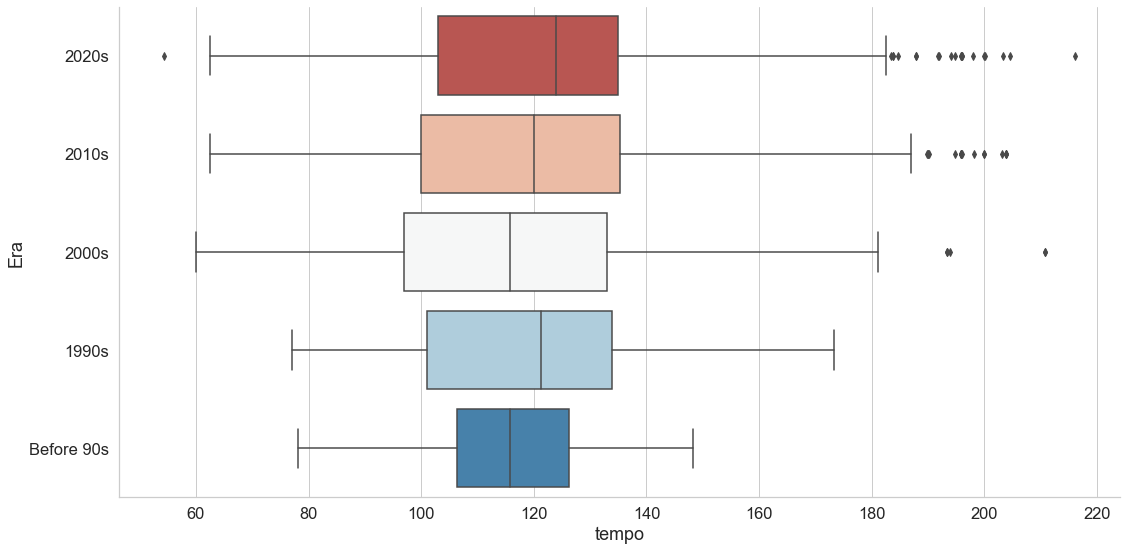

In [408]:
order = ["2020s", "2010s", "2000s", "1990s", "Before 90s"]
sns.catplot(x = "tempo", y = "Era", data = tracks, 
            kind = "box",
            order = order, 
            palette = "RdBu", 
            orient = "h", 
            aspect = 2,height = 8)
plt.show()

---
### People love vocal as always

*No matter what decades the songs are from, the Tiktoker tend to use the one with vocal instead of instrumental songs, as vocalists are always the one that get the most attention from the perspective of the listener, second to the Tiktoker in videos.*

---

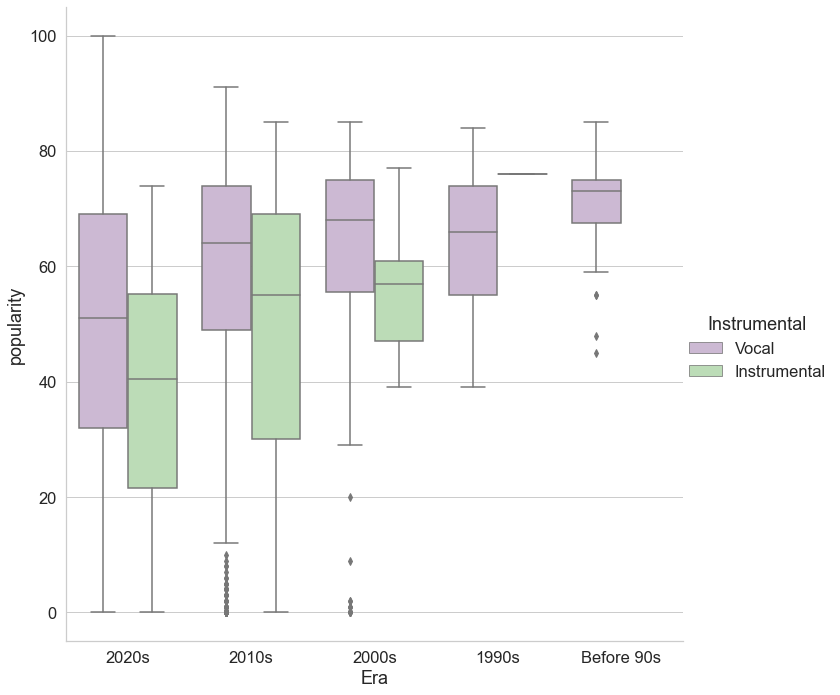

In [357]:

sns.catplot(y = "popularity", x = "Era", data = tracks,
            hue = "Instrumental", 
            kind = "box", 
            order = order, 
            palette = "PRGn", 
            height = 10)
plt.show()

---
### Correlation heatmap

Let's take a look at the correlation heatmap.

---

In [332]:
categorical = ["duration", "release_date", "genre", "explicit", "major_minor", "Instrumental", "Era", "instrumentalness", "mode"]
correlation = tracks.drop(categorical, axis = 1)

<AxesSubplot:>

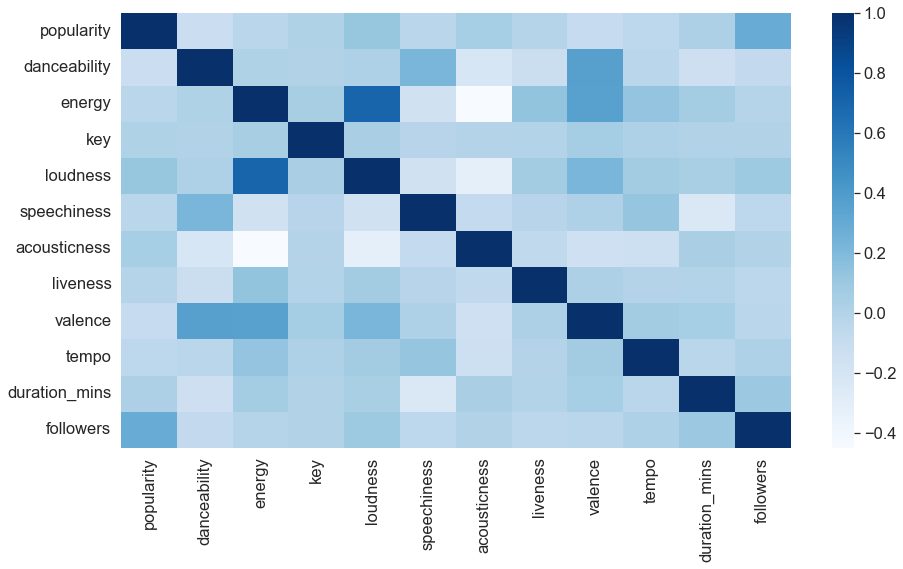

In [334]:
corr_matrix = correlation.corr()
sns.heatmap(corr_matrix, cmap = "Blues")

---
*From the correlation heatmap we can see there's a strong relationship between the loudness and energy. The plot below shows that there exist a linear relationship between loudness and energy: the louder the song is, the more energy it brings. From the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features): Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). This explains why the songs with more acousticness have lower loudness and energy compared to the rest, since they usually convey more smooth and relaxing mood instead of showing "strength".*

---

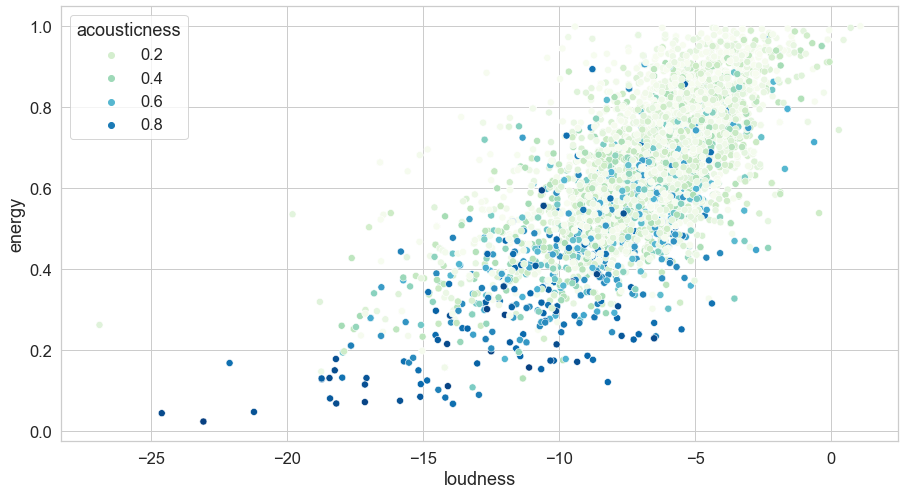

In [336]:
sns.set_style("whitegrid")

sns.scatterplot(x = 'loudness', y = 'energy', data = tracks, 
                hue = "acousticness", 
                s = 50, 
                palette = "GnBu")

plt.show()

---
### Does more energetic means better?

No, not really. From the graph below, it shows that there's no strong linear relationship between those two, because of the fact that the category of Tiktok video are very diverse, it's not only about energy and dancing after all. 

---

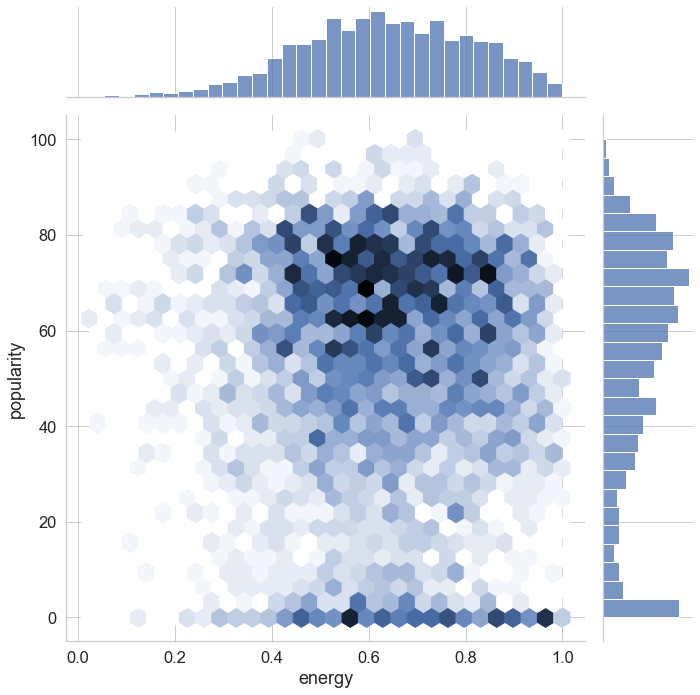

In [410]:

sns.jointplot(y = tracks['popularity'], x = tracks['energy'], kind = "hex", height = 10)
plt.show()

---
### Does scale matter?

*From the perspective of a musician, a general rule of thumb says that songs with major scale tends to be bright and positive and ones with minor scale are more "sad". However, using the measurement `valence` ([Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features): A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.), it shows that this rule may not be true, it doesn't affecting the mood nor the popularity of the song as shown above, either minor or major scale are appearing in all level of positiveness and popularity.*

---

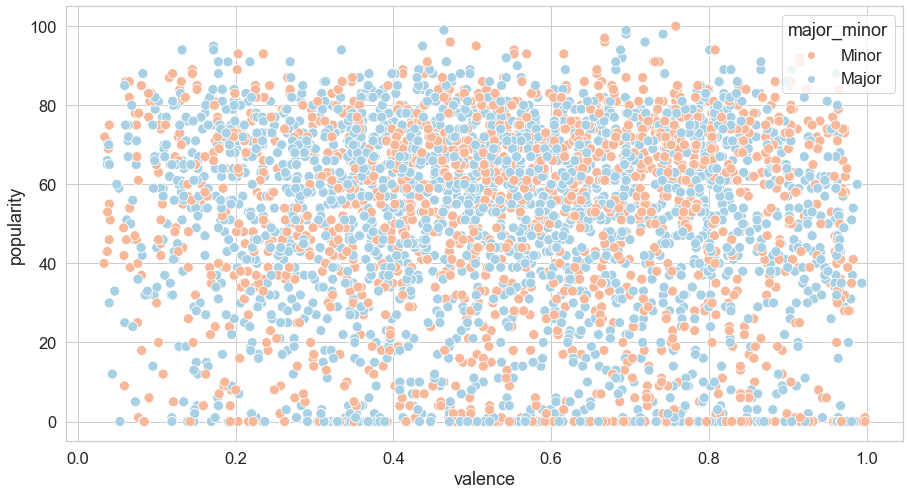

In [350]:
sns.set_style("whitegrid")
sns.scatterplot(x = 'valence', y = 'popularity', data = tracks, 
                hue = "major_minor",
                palette = "RdBu", 
                s = 100)
plt.show()

---
### More talking?

*With the popularity of hip hop music in younger generation, the use of hip hop is very common on Tiktok. Although the majority of songs have very low speechiness, it's interesting to see that those tracks with higher speechiness are associated with higher danceability as well, especially those explicit ones, which comes as a surprise for me.*

---

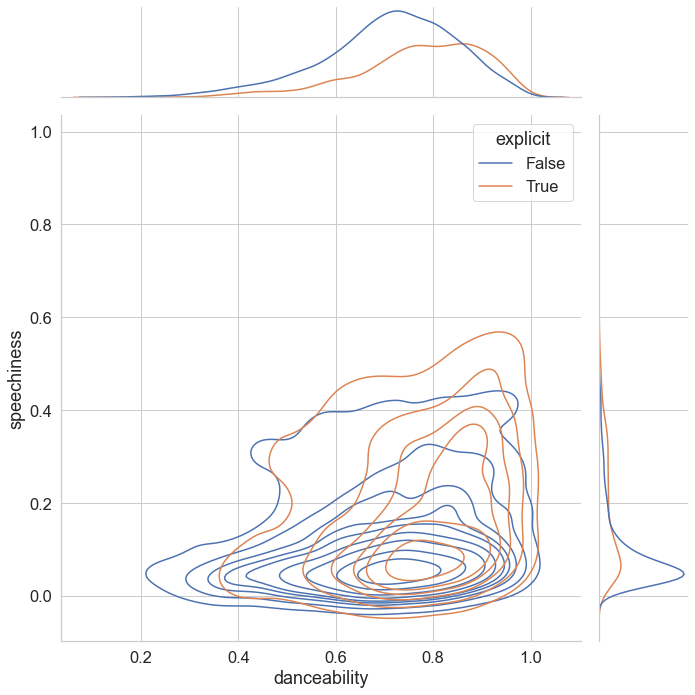

In [413]:
sns.set_style("whitegrid")

sns.jointplot(x = 'danceability', y = 'speechiness', 
              hue = "explicit",
              kind = "kde", 
              data = tracks, 
              height = 10)
plt.show()

## Conclusions 

From above analysis, it's obvious that there are many different factors contribute to the popularity of the songs used in Tiktok, and they also reflect the evolution of music production over the decades. After all, there may not be a strict rule behind whether a song is popular or not and which one should be used in a Tiktok video; what's more important is that **the creativity behind is the reason why artists win love from the people.**